In [1]:
# Import the necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime as dt
import random

In [2]:
# Import the data
with open ('/Users/biancabonifacio/Downloads/python/transaction-data-adhoc-analysis.json') as pathlink:
    transaction_data = json.load(pathlink)
    df = pd.DataFrame(transaction_data)

In [3]:
# Separate each listed transaction item to have their own row to satisfy the requirement of transforming listed items into a granularity
df["transaction_items"] = df["transaction_items"].astype(str).str.split(";")
df = df.explode("transaction_items").reset_index(drop=True)
cols = list(df.columns)
cols.append(cols.pop(cols.index("username")))
df = df[cols]

df

,address,birthdate,mail,name,sex,transaction_items,transaction_value,transaction_date,username
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,veronicawells
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,cgilbert
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,cgilbert
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"Candy City,Orange Beans,(x1)",12056,2022/01/12,cgilbert
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,cgilbert
...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,llowe
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,llowe
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,cmcdowell
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,cmcdowell


In [4]:
#Extract the number of items from the description of each transaction_item by separating it from the brand and item
df[['brand','item','quantity']] = df['transaction_items'].str.split(',', expand=True)

#Now, convert it to an integer by removing the unecessary characters.
df['quantity'] = df['quantity'].str.replace(")","", regex=True)
df['quantity'] = df['quantity'].str.replace("(","", regex=True)
df['quantity'] = df['quantity'].str.replace("x","", regex=True)

df

,address,birthdate,mail,name,sex,transaction_items,transaction_value,transaction_date,username,brand,item,quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,veronicawells,Exotic Extras,Beef Chicharon,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,cgilbert,Exotic Extras,Beef Chicharon,3
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,cgilbert,HealthyKid 3+,Nutrional Milk,4
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"Candy City,Orange Beans,(x1)",12056,2022/01/12,cgilbert,Candy City,Orange Beans,1
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,cgilbert,HealthyKid 3+,Gummy Vitamins,3
...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,llowe,HealthyKid 3+,Nutrional Milk,2
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,llowe,Candy City,Gummy Worms,2
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,cmcdowell,HealthyKid 3+,Nutrional Milk,1
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,cmcdowell,Candy City,Gummy Worms,3


In [7]:
#Now that the items are all separated, replace the transaction_value.
#This was solved for by manually calculating the prices of each product. 
items = [(df["item"] == "Beef Chicharon"),
         (df["item"] == "Gummy Worms"),
         (df["item"] == "Gummy Vitamins"),
         (df["item"] == "Kimchi and Seaweed"),
         (df["item"] == "Nutrional Milk"),
         (df["item"] == "Orange Beans"),
         (df["item"] == "Yummy Vegetables"),
        ]

prices = [(df["quantity"] * 1299),
          (df["quantity"] * 150),
          (df["quantity"] * 1500),
          (df["quantity"] * 799),
          (df["quantity"] * 1990),
          (df["quantity"] * 199),
          (df["quantity"] * 500)
         ]

df["total_sale_value"] = np.select(items, prices)
del df["transaction_value"]

In [8]:
#To display the breakdown of each item sold per month as well as total sale value per item per month
df[['Year','Month','Day']] = df['transaction_date'].str.split('/', expand=True)

df[['item', 'quantity']]
df['quantity'] = df['quantity'].astype(int)

df.groupby(['Month', 'item']).agg({'quantity':'sum', 'total_sale_value': 'sum'})

quantity  total_sale_value
Month item                                          
01    Beef Chicharon          9665          12554835
      Gummy Vitamins          9681          14521500
      Gummy Worms             9559           1433850
      Kimchi and Seaweed      9676           7731124
      Nutrional Milk          9727          19356730
      Orange Beans            9774           1945026
      Yummy Vegetables        9959           4979500
02    Beef Chicharon         10001          12991299
      Gummy Vitamins          9980          14970000
      Gummy Worms             9996           1499400
      Kimchi and Seaweed      9949           7949251
      Nutrional Milk          9691          19285090
      Orange Beans           10037           1997363
      Yummy Vegetables       10256           5128000
03    Beef Chicharon          9816          12750984
      Gummy Vitamins         10145          15217500
      Gummy Worms             9986           1497900
      Kimchi and Seaweed      9967           7963633
      Nutrional Milk          9876          19653240
      Orange Beans            9611           1912589
      Yummy Vegetables        9896           4948000
04    Beef Chicharon          9890          12847110
      Gummy Vitamins          9842          14763000
      Gummy Worms            10043           1506450
      Kimchi and Seaweed      9921           7926879
      Nutrional Milk          9786          19474140
      Orange Beans            9914           1972886
      Yummy Vegetables        9861           4930500
05    Beef Chicharon         10028          13026372
      Gummy Vitamins          9948          14922000
      Gummy Worms             9801           1470150
      Kimchi and Seaweed      9773           7808627
      Nutrional Milk          9881          19663190
      Orange Beans            9964           1982836
      Yummy Vegetables        9735           4867500
06    Beef Chicharon          9902          12862698
      Gummy Vitamins          9980          14970000
      Gummy Worms             9934           1490100
      Kimchi and Seaweed     10104           8073096
      Nutrional Milk          9767          19436330
      Orange Beans           10106           2011094
      Yummy Vegetables        9722           4861000

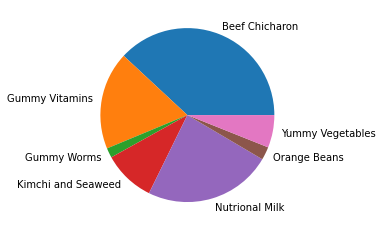

In [51]:
#This shows which products produced the most sales for Lola Tamis within the past six months. 
#With that, perhaps Lola Tamis can focus more on producing more Beef Chicharon and Nutrional Milk.
y = np.array([187033295, 89364000, 8897850, 47452610,116868720,11921794, 29714500])
mylabels = ["Beef Chicharon", "Gummy Vitamins", "Gummy Worms", "Kimchi and Seaweed", "Nutrional Milk", "Orange Beans", "Yummy Vegetables"]

plt.pie(y, labels = mylabels)
plt.show() 

In [41]:
#Creating a pivot table that was supposed to be the foundation for the next steps :<
purchase_history = pd.pivot_table(df, index ='name', columns = 'Month', values = 'quantity', aggfunc = 'count', fill_value = 0)
purchase_history

Month,1,2,3,4,5,6
name,,,,,,
Aaron Beasley,0,0,0,4,3,1
Aaron Brewer,2,2,1,3,0,5
Aaron Brown,0,0,5,5,3,1
Aaron Coffey,1,3,4,4,5,0
Aaron Davis,2,1,0,6,8,5
...,...,...,...,...,...,...
Zachary Valentine,3,3,3,2,5,8
Zachary Ware,3,4,6,2,7,4
Zachary Williams,10,8,7,5,0,0
